   <a href="https://colab.research.google.com/github/marcpalo1999/MIA_sanidad/blob/main/2_1_Solucion_Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
if os.path.exists('/content'):
    if not os.path.exists('/content/MIA_sanidad'):
        os.system('git clone https://github.com/marcpalo1999/MIA_sanidad.git')
    os.chdir('/content/MIA_sanidad')
os.getcwd()


'/Volumes/Personal/CEMP/MIA_sanidad'

   # SOLUCIONES - Introducción a Pandas para Análisis de Datos Médicos



   Este archivo contiene las soluciones completas de todos los ejercicios del notebook de

   introducción a Pandas. Cada solución incluye explicaciones detalladas y métodos

   alternativos cuando es relevante.

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



 ## SOLUCIONES - Ejercicios Capítulo 1 y 2: Exploración Básica

 ### Ejercicio 1



 Usando los métodos que acabas de aprender:



 0. Cargar el dataset

 1. Muestra las primeras 10 filas del dataset

 2. Cuenta cuántas filas y columnas tiene el dataset

 3. Identifica qué tipos de datos hay en cada columna

In [4]:
# SOLUCIÓN EJERCICIO 1

# Cargar el dataset
df = pd.read_csv("./data/heart_disease_dataset_con_nulos.csv")



In [5]:
# 1. Mostrar las primeras 10 filas usando head(n)
df.head(10)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3.0,0.0,6.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2.0,3.0,3.0,2.0
2,67,1,4,120,229,0,2,129,1,2.6,2.0,2.0,7.0,1.0
3,37,1,3,130,250,0,0,187,0,3.5,3.0,0.0,3.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1.0,0.0,3.0,0.0
5,56,1,2,120,236,0,0,178,0,0.8,1.0,0.0,3.0,0.0
6,62,0,4,140,268,0,2,160,0,3.6,3.0,2.0,3.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1.0,0.0,3.0,0.0
8,63,1,4,130,254,0,2,147,0,1.4,2.0,1.0,7.0,2.0
9,53,1,4,140,203,1,2,155,1,3.1,3.0,0.0,7.0,1.0


In [6]:
# 2. Obtener dimensiones usando shape - devuelve tupla (filas, columnas)
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas (pacientes) y {columnas} columnas (variables)")

# Método alternativo: usar len()
print(f"Método alternativo — Filas: {len(df)}, Columnas: {len(df.columns)}")



El dataset tiene 303 filas (pacientes) y 14 columnas (variables)
Método alternativo — Filas: 303, Columnas: 14


In [7]:
# 3. Ver tipos de datos de cada columna usando dtypes
df.dtypes

# Explicación de tipos encontrados:
# int64: Números enteros (edad, presión, etc.)
# float64: Números decimales (colesterol, etc.)
# object: Generalmente texto, pero puede incluir datos mixtos

# Método alternativo: usar info() que da más contexto sobre memoria y nulos
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     288 non-null    float64
 11  ca        284 non-null    float64
 12  thal      286 non-null    float64
 13  num       287 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


 ### Ejercicio 2



 Explora las estadísticas descriptivas:



 1. Usa `.describe()` para ver el resumen estadístico

 2. Identifica cuál es la edad promedio de los pacientes

 3. Encuentra el valor máximo y mínimo del colesterol

In [8]:
# SOLUCIÓN EJERCICIO 2

# 1. Resumen estadístico de todas las variables numéricas
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,288.000000,284.000000,286.000000,287.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.597222,0.683099,4.685315,0.951220
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.622678,0.935138,1.930074,1.213728
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
# 2. Edad promedio de los pacientes
edad_promedio = df['age'].mean()
edad_mediana = df['age'].median()
edad_std = df['age'].std()

print(f"Edad promedio: {edad_promedio:.1f} años")
print(f"Edad mediana:  {edad_mediana:.1f} años")
print(f"Desviación estándar: {edad_std:.1f} años")

# La mediana es útil en clínica porque no se ve afectada por outliers.
# Si media y mediana son similares, la distribución es aproximadamente simétrica.



Edad promedio: 54.4 años
Edad mediana:  56.0 años
Desviación estándar: 9.0 años


In [10]:
# 3. Valores extremos del colesterol
colesterol_max = df['chol'].max()
colesterol_min = df['chol'].min()
rango_colesterol = colesterol_max - colesterol_min

print(f"Colesterol máximo: {colesterol_max} mg/dL")
print(f"Colesterol mínimo: {colesterol_min} mg/dL")
print(f"Rango: {rango_colesterol} mg/dL")
print(f"\nNota clínica: un mínimo de 0 mg/dL es fisiológicamente imposible.")
print(f"Esto indica un valor nulo codificado como 0, que habrá que tratar.")



Colesterol máximo: 564 mg/dL
Colesterol mínimo: 126 mg/dL
Rango: 438 mg/dL

Nota clínica: un mínimo de 0 mg/dL es fisiológicamente imposible.
Esto indica un valor nulo codificado como 0, que habrá que tratar.


 ## SOLUCIONES - Ejercicios Capítulo 3: Selección de Datos

 ### Ejercicio 1



 Practica la selección de datos:



 1. Selecciona solo la columna `trestbps` (presión arterial)

 2. Selecciona las columnas `age`, `sex` y `thalach` de los primeros 8 pacientes

 3. Muestra la información completa del paciente en la posición 50

In [11]:
# SOLUCIÓN EJERCICIO 1

# 1. Seleccionar solo la columna trestbps (presión arterial)
presion_arterial = df["trestbps"]  # Devuelve una Serie
# Método alternativo: df.trestbps (solo funciona si no hay espacios en el nombre)

presion_arterial.head(10)



0    145
1    160
2    120
3    130
4    130
5    120
6    140
7    120
8    130
9    140
Name: trestbps, dtype: int64

In [12]:
# 2. Seleccionar columnas específicas de los primeros 8 pacientes
# Método 1: Seleccionar columnas primero, luego filas con head()
subset_columnas = df[["age", "sex", "thalach"]].head(8)

# Método alternativo con loc: selecciona filas y columnas simultáneamente
# loc[0:7] incluye el 7 (a diferencia de iloc)
subset_loc = df.loc[0:7, ["age", "sex", "thalach"]]

subset_columnas



,age,sex,thalach
0,63,1,150
1,67,1,108
2,67,1,129
3,37,1,187
4,41,0,172
5,56,1,178
6,62,0,160
7,57,0,163


In [13]:
# 3. Información completa del paciente en posición 50
# Usar iloc para seleccionar por posición (índice 0-based)
paciente_50 = df.iloc[50]

print("Información del paciente en posición 50:")
print(paciente_50)

# Acceder a campos específicos de forma legible
print(f"\nResumen: {'Hombre' if paciente_50['sex'] == 1 else 'Mujer'} de {paciente_50['age']} años")
print(f"Presión arterial: {paciente_50['trestbps']} mmHg")
print(f"Colesterol: {paciente_50['chol']} mg/dL")
print(f"Diagnóstico (num): {paciente_50['num']}")



Información del paciente en posición 50:
age          41.0
sex           0.0
cp            2.0
trestbps    105.0
chol        198.0
fbs           0.0
restecg       0.0
thalach     168.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            1.0
thal          3.0
num           0.0
Name: 50, dtype: float64

Resumen: Mujer de 41.0 años
Presión arterial: 105.0 mmHg
Colesterol: 198.0 mg/dL
Diagnóstico (num): 0.0


 ### Ejercicio 2



 Practica con iloc y loc:



 1. Usa `iloc` para seleccionar las filas 10-15 y las columnas 2-5

 2. Usa `loc` para seleccionar las primeras 5 filas de las columnas `age`, `chol` y `num`

In [14]:
# SOLUCIÓN EJERCICIO 2

# 1. iloc para filas 10-15 y columnas 2-5
# iloc[10:16, 2:6] porque iloc EXCLUYE el último número del rango (como range())
subset_iloc = df.iloc[10:16, 2:6]

# ¿Qué columnas son las posiciones 2-5?
print(f"Columnas seleccionadas (posiciones 2-5): {list(df.columns[2:6])}")
subset_iloc



Columnas seleccionadas (posiciones 2-5): ['cp', 'trestbps', 'chol', 'fbs']


,cp,trestbps,chol,fbs
10,4,140,192,0
11,2,140,294,0
12,3,130,256,1
13,2,120,263,0
14,3,172,199,1
15,3,150,168,0


In [15]:
# 2. loc para primeras 5 filas de columnas específicas
# DIFERENCIA CLAVE: loc[0:4] incluye el 4 (a diferencia de iloc[0:4] que lo excluye)
subset_loc = df.loc[0:4, ["age", "chol", "num"]]

# Método alternativo equivalente (más claro de leer):
# df[["age", "chol", "num"]].head(5)

print("Diferencia importante:")
print("  iloc[0:5] → filas 0,1,2,3,4  (excluye el 5)")
print("  loc[0:4]  → filas 0,1,2,3,4  (incluye el 4)")
subset_loc



Diferencia importante:
  iloc[0:5] → filas 0,1,2,3,4  (excluye el 5)
  loc[0:4]  → filas 0,1,2,3,4  (incluye el 4)


,age,chol,num
0,63,233,0.0
1,67,286,2.0
2,67,229,1.0
3,37,250,0.0
4,41,204,0.0


 ## SOLUCIONES - Ejercicios Capítulo 4: Filtrado de Datos

 ### Ejercicio 1



 Practica filtros simples:



 1. Filtra pacientes menores de 40 años

 2. Filtra pacientes con colesterol mayor a 250

 3. Filtra pacientes que tienen enfermedad cardíaca (`num` > 0)

In [16]:
# SOLUCIÓN EJERCICIO 1

# 1. Pacientes menores de 40 años
menores_40 = df[df["age"] < 40]
print(f"Pacientes menores de 40 años: {len(menores_40)} ({len(menores_40)/len(df)*100:.1f}% del total)")

menores_40.head()



Pacientes menores de 40 años: 15 (5.0% del total)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
3,37,1,3,130,250,0,0,187,0,3.5,3.0,0.0,3.0,0.0
82,39,1,3,140,321,0,2,182,0,0.0,1.0,0.0,3.0,0.0
101,34,1,1,118,182,0,2,174,0,0.0,1.0,0.0,3.0,0.0
109,39,1,4,118,219,0,0,140,0,1.2,2.0,0.0,7.0,3.0
117,35,0,4,138,183,0,0,182,0,1.4,1.0,0.0,3.0,0.0


In [17]:
# 2. Pacientes con colesterol mayor a 250
colesterol_alto = df[df["chol"] > 250]
print(f"Pacientes con colesterol > 250 mg/dL: {len(colesterol_alto)} ({len(colesterol_alto)/len(df)*100:.1f}% del total)")

colesterol_alto.head()



Pacientes con colesterol > 250 mg/dL: 127 (41.9% del total)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67,1,4,160,286,0,2,108,1,1.5,2.0,3.0,3.0,2.0
6,62,0,4,140,268,0,2,160,0,3.6,3.0,2.0,3.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1.0,0.0,3.0,0.0
8,63,1,4,130,254,0,2,147,0,1.4,2.0,1.0,7.0,2.0
11,56,0,2,140,294,0,2,153,0,1.3,2.0,0.0,3.0,0.0


In [18]:
# 3. Pacientes con enfermedad cardíaca (num > 0) y sin enfermedad (num == 0)
con_enfermedad = df[df["num"] > 0]
sin_enfermedad = df[df["num"] == 0]

print(f"Con enfermedad (num > 0): {len(con_enfermedad)} pacientes ({len(con_enfermedad)/len(df)*100:.1f}%)")
print(f"Sin enfermedad (num = 0): {len(sin_enfermedad)} pacientes ({len(sin_enfermedad)/len(df)*100:.1f}%)")
print(f"\nDistribución por nivel de enfermedad:")
print(df["num"].value_counts().sort_index())

# Métodos alternativos para filtrar:
# df.query('num > 0')
# df[df['num'].isin([1, 2, 3, 4])]



Con enfermedad (num > 0): 136 pacientes (44.9%)
Sin enfermedad (num = 0): 151 pacientes (49.8%)

Distribución por nivel de enfermedad:
num
0.0    151
1.0     55
2.0     36
3.0     34
4.0     11
Name: count, dtype: int64


 ### Ejercicio 2



 Practica filtros con múltiples condiciones:



 1. Encuentra mujeres con presión arterial mayor a 130

 2. Encuentra hombres menores de 45 años CON enfermedad cardíaca

 3. Encuentra pacientes con colesterol alto (>240) O frecuencia cardíaca baja (<120)

In [19]:
# SOLUCIÓN EJERCICIO 2

# 1. Mujeres (sex=0) con presión > 130
# IMPORTANTE: cada condición va entre paréntesis, y se unen con & (AND)
mujeres_presion_alta = df[(df["sex"] == 0) & (df["trestbps"] > 130)]

total_mujeres = len(df[df["sex"] == 0])
print(f"Mujeres con presión > 130: {len(mujeres_presion_alta)} de {total_mujeres} mujeres")
print(f"  ({len(mujeres_presion_alta)/total_mujeres*100:.1f}% de todas las mujeres del dataset)")

mujeres_presion_alta.head()



Mujeres con presión > 130: 49 de 97 mujeres
  (50.5% de todas las mujeres del dataset)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
6,62,0,4,140,268,0,2,160,0,3.6,3.0,2.0,3.0,3.0
11,56,0,2,140,294,0,2,153,0,1.3,2.0,0.0,3.0,0.0
21,58,0,1,150,283,1,2,162,0,1.0,1.0,0.0,3.0,0.0
27,66,0,1,150,226,0,0,114,0,2.6,3.0,0.0,3.0,0.0
30,69,0,1,140,239,0,0,151,0,1.8,1.0,NaN,3.0,0.0


In [20]:
# 2. Hombres (sex=1) menores de 45 años CON enfermedad (num > 0)
hombres_jovenes_enfermos = df[(df["sex"] == 1) & (df["age"] < 45) & (df["num"] > 0)]

total_hombres_jovenes = len(df[(df["sex"] == 1) & (df["age"] < 45)])
print(f"Hombres <45 años con enfermedad: {len(hombres_jovenes_enfermos)} de {total_hombres_jovenes} hombres jóvenes")
print(f"  ({len(hombres_jovenes_enfermos)/total_hombres_jovenes*100:.1f}% de los hombres menores de 45)")

hombres_jovenes_enfermos



Hombres <45 años con enfermedad: 13 de 40 hombres jóvenes
  (32.5% de los hombres menores de 45)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
29,40,1,4,110,167,0,2,114,1,2.0,2.0,NaN,7.0,3.0
36,43,1,4,120,177,0,2,120,1,2.5,2.0,0.0,7.0,3.0
52,44,1,4,112,290,0,2,153,0,0.0,1.0,1.0,3.0,2.0
57,41,1,4,110,172,0,2,158,0,0.0,1.0,0.0,7.0,1.0
74,44,1,4,110,197,0,2,177,0,0.0,1.0,1.0,3.0,1.0
109,39,1,4,118,219,0,0,140,0,1.2,2.0,0.0,7.0,3.0
138,35,1,4,120,198,0,0,130,1,1.6,2.0,0.0,7.0,1.0
168,35,1,4,126,282,0,2,156,1,0.0,1.0,0.0,7.0,1.0
192,43,1,4,132,247,1,2,143,1,0.1,2.0,NaN,7.0,1.0
211,38,1,1,120,231,0,0,182,1,3.8,2.0,0.0,7.0,4.0


In [21]:
# 3. Colesterol alto (>240) O frecuencia cardíaca baja (<120)
# Usar | para OR — ambas condiciones entre paréntesis
colesterol_o_frecuencia = df[(df["chol"] > 240) | (df["thalach"] < 120)]

print(f"Pacientes con colesterol > 240: {len(df[df['chol'] > 240])}")
print(f"Pacientes con thalach < 120:   {len(df[df['thalach'] < 120])}")
print(f"Pacientes que cumplen AL MENOS UNA: {len(colesterol_o_frecuencia)}")
print(f"(el total es menor que la suma porque algunos pacientes cumplen ambas)")

colesterol_o_frecuencia.head()



Pacientes con colesterol > 240: 152
Pacientes con thalach < 120:   34
Pacientes que cumplen AL MENOS UNA: 168
(el total es menor que la suma porque algunos pacientes cumplen ambas)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67,1,4,160,286,0,2,108,1,1.5,2.0,3.0,3.0,2.0
3,37,1,3,130,250,0,0,187,0,3.5,3.0,0.0,3.0,0.0
6,62,0,4,140,268,0,2,160,0,3.6,3.0,2.0,3.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1.0,0.0,3.0,0.0
8,63,1,4,130,254,0,2,147,0,1.4,2.0,1.0,7.0,2.0


 ## SOLUCIONES - Ejercicios Capítulo 5: Creación de Columnas

 ### Ejercicio 1



 Crea nuevas columnas básicas:



 1. Crea una columna `edad_años_2030` que muestre la edad que tendrán los pacientes en 2030

 2. Crea una columna `frecuencia_por_edad` que divida `thalach` entre `age`

In [22]:
# SOLUCIÓN EJERCICIO 1

# 1. Edad en 2030 (diferencia: 2030 - 2024 = 6 años)
diff = 2030 - 2024
df["edad_años_2030"] = df["age"] + diff

# Método alternativo con apply (más flexible para lógica compleja):
# df["edad_2030_alt"] = df["age"].apply(lambda x: x + 6)

df[["age", "edad_años_2030"]].head(10)



,age,edad_años_2030
0,63,69
1,67,73
2,67,73
3,37,43
4,41,47
5,56,62
6,62,68
7,57,63
8,63,69
9,53,59


In [23]:
# 2. Ratio frecuencia cardíaca por edad
# Interpretación clínica: valores más altos indican mejor reserva cronotrópica relativa a la edad
df["frecuencia_por_edad"] = (df["thalach"] / df["age"]).round(2)

print(f"Media del ratio frecuencia/edad: {df['frecuencia_por_edad'].mean():.2f}")
print(f"Rango: {df['frecuencia_por_edad'].min():.2f} – {df['frecuencia_por_edad'].max():.2f}")

df[["age", "thalach", "frecuencia_por_edad"]].head(10)



Media del ratio frecuencia/edad: 2.86
Rango: 1.06 – 6.97


,age,thalach,frecuencia_por_edad
0,63,150,2.38
1,67,108,1.61
2,67,129,1.93
3,37,187,5.05
4,41,172,4.20
5,56,178,3.18
6,62,160,2.58
7,57,163,2.86
8,63,147,2.33
9,53,155,2.92


 ### Ejercicio 2



 Crea columnas categóricas:



 1. Crea una función que clasifique la presión arterial (`trestbps`):

    - "Normal": menor a 120

    - "Elevada": entre 120 y 129

    - "Alta": 130 o más

 2. Aplica esta función para crear la columna `categoria_presion`

In [24]:
# SOLUCIÓN EJERCICIO 2

# 1. Función para clasificar presión arterial según guías médicas estándar
def clasificar_presion_arterial(presion):
    """
    Clasifica presión sistólica según guías médicas (AHA/ACC 2017).
    Maneja valores nulos para no generar errores.
    """
    if pd.isna(presion):
        return "Sin datos"
    elif presion < 120:
        return "Normal"
    elif presion < 130:   # 120 - 129
        return "Elevada"
    else:                 # >= 130
        return "Alta"

# 2. Aplicar la función con .apply() para crear nueva columna
df["categoria_presion"] = df["trestbps"].apply(clasificar_presion_arterial)

print("Distribución de categorías de presión arterial:")
print(df["categoria_presion"].value_counts())

# Método alternativo con np.where anidado (más conciso):
# df["categoria_presion"] = np.where(df["trestbps"] < 120, "Normal",
#                                    np.where(df["trestbps"] < 130, "Elevada", "Alta"))

# Método alternativo con pd.cut (ideal para rangos numéricos fijos):
# df["categoria_presion"] = pd.cut(df["trestbps"],
#                                  bins=[0, 120, 130, 300],
#                                  labels=["Normal", "Elevada", "Alta"])



Distribución de categorías de presión arterial:
categoria_presion
Alta       168
Elevada     75
Normal      60
Name: count, dtype: int64


 ### Ejercicio 3



 Usa mapeo y condicionales:



 1. Crea un diccionario para mapear los valores de `cp` (dolor en pecho):

    - 1: "Angina típica", 2: "Angina atípica", 3: "Dolor no anginoso", 4: "Asintomático"

    - Aplícalo para crear la columna `tipo_dolor`

In [25]:
# SOLUCIÓN EJERCICIO 3

# 1. Diccionario de mapeo para tipos de dolor en pecho
mapeo_dolor = {
    1: "Angina típica",
    2: "Angina atípica",
    3: "Dolor no anginoso",
    4: "Asintomático"
}

# Aplicar el mapeo con .map() — mucho más limpio que múltiples np.where anidados
df["tipo_dolor"] = df["cp"].map(mapeo_dolor)

print("Distribución de tipos de dolor torácico:")
print(df["tipo_dolor"].value_counts())

# Verificar que no hay valores sin mapear (NaN indicaría un valor de cp no contemplado)
print(f"\nValores sin mapear: {df['tipo_dolor'].isna().sum()}")

df[["cp", "tipo_dolor"]].head(10)

# Nota clínica: la mayoría son "asintomáticos" porque este dataset proviene de pacientes
# ya seleccionados para cateterismo, no de la población general.



Distribución de tipos de dolor torácico:
tipo_dolor
Asintomático         144
Dolor no anginoso     86
Angina atípica        50
Angina típica         23
Name: count, dtype: int64

Valores sin mapear: 0


,cp,tipo_dolor
0,1,Angina típica
1,4,Asintomático
2,4,Asintomático
3,3,Dolor no anginoso
4,2,Angina atípica
5,2,Angina atípica
6,4,Asintomático
7,4,Asintomático
8,4,Asintomático
9,4,Asintomático


 ---

 ## SOLUCIONES - Ejercicios Capítulo 6: Valores Nulos

 ### Ejercicio 1



 Detecta y analiza valores nulos:



 1. Cuenta cuántos valores nulos hay en total en el dataset

 2. Identifica qué columnas tienen valores nulos

 3. Calcula qué porcentaje del dataset representan los valores nulos

In [26]:
# SOLUCIÓN EJERCICIO 1

# 1. Total de valores nulos en todo el dataset
total_nulos = df.isnull().sum().sum()
total_celdas = df.shape[0] * df.shape[1]
print(f"Total de valores nulos en el dataset: {total_nulos}")
print(f"Total de celdas: {total_celdas}")
print(f"Porcentaje de celdas con nulo: {total_nulos/total_celdas*100:.2f}%")



Total de valores nulos en el dataset: 67
Total de celdas: 5454
Porcentaje de celdas con nulo: 1.23%


In [27]:
# 2. Qué columnas tienen valores nulos y cuántos
nulos_por_columna = df.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

# Método alternativo: mostrar solo las que tienen nulos con un filtro booleano
print("\nVerificación con filtro booleano:")
print(df.isnull().any()[df.isnull().any()])



Columnas con valores nulos:
slope    15
ca       19
thal     17
num      16
dtype: int64

Verificación con filtro booleano:
slope    True
ca       True
thal     True
num      True
dtype: bool


In [28]:
# 3. Porcentaje de nulos por columna (solo las que tienen alguno)
porcentaje_nulos = (df.isnull().sum() / len(df) * 100).round(2)
porcentaje_nulos_relevantes = porcentaje_nulos[porcentaje_nulos > 0].sort_values(ascending=False)

print("Porcentaje de nulos por columna (columnas afectadas):")
print(porcentaje_nulos_relevantes)

# Interpretación: para el modelo de ML, estos porcentajes son bajos (<10%),
# lo que nos permite imputar con mediana en lugar de eliminar pacientes.



Porcentaje de nulos por columna (columnas afectadas):
ca       6.27
thal     5.61
num      5.28
slope    4.95
dtype: float64


 ### Ejercicio 2



 Si encuentras valores nulos, practica diferentes estrategias:



 1. Crea una copia del dataset llamada `df_test`

 2. Para cualquier columna numérica con nulos, rellénalos con la mediana

 3. Para cualquier columna categórica con nulos, rellénalos con "Desconocido"

In [29]:
# SOLUCIÓN EJERCICIO 2

# 1. Crear copia para no modificar el original
# SIEMPRE usar .copy() — sin él, los cambios en df_test afectarían a df
df_test = df.copy()

print("Nulos ANTES de imputar:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])



Nulos ANTES de imputar:
slope    15
ca       19
thal     17
num      16
dtype: int64


In [30]:
# 2. Rellenar nulos en columnas NUMÉRICAS con la mediana
# La mediana es más robusta que la media ante valores extremos (outliers)
columnas_numericas_con_nulos = df_test.select_dtypes(include=[np.number]).columns[
    df_test.select_dtypes(include=[np.number]).isnull().any()
]

for col in columnas_numericas_con_nulos:
    mediana = df_test[col].median()
    df_test[col] = df_test[col].fillna(mediana)
    print(f"  '{col}': {df[col].isnull().sum()} nulos → imputados con mediana ({mediana:.1f})")



  'slope': 15 nulos → imputados con mediana (2.0)
  'ca': 19 nulos → imputados con mediana (0.0)
  'thal': 17 nulos → imputados con mediana (3.0)
  'num': 16 nulos → imputados con mediana (0.0)


In [31]:
# 3. Rellenar nulos en columnas CATEGÓRICAS (object) con "Desconocido"
columnas_categoricas_con_nulos = df_test.select_dtypes(include=['object']).columns[
    df_test.select_dtypes(include=['object']).isnull().any()
]

for col in columnas_categoricas_con_nulos:
    n_nulos = df_test[col].isnull().sum()
    df_test[col] = df_test[col].fillna("Desconocido")
    print(f"  '{col}': {n_nulos} nulos → imputados con 'Desconocido'")

print("\nNulos DESPUÉS de imputar:")
print(df_test.isnull().sum().sum(), "→ debería ser 0")

# Nota importante: en el contexto de ML (como veremos en el módulo siguiente),
# la imputación debe calcularse SOLO sobre el conjunto de entrenamiento
# y luego aplicarse al conjunto de test. Aquí lo hacemos de forma simplificada.




Nulos DESPUÉS de imputar:
0 → debería ser 0


 ---

 ## SOLUCIONES - Ejercicios Capítulo 7: Exploración de Datos

 ### Ejercicio 1



 Explora la distribución de variables:



 1. Cuenta los valores únicos de la variable `cp` (tipo de dolor)

 2. Calcula qué porcentaje de pacientes tiene cada tipo de dolor

 3. Encuentra la edad promedio por tipo de dolor

In [32]:
# SOLUCIÓN EJERCICIO 1

# Primero asegurarnos de que tenemos la columna tipo_dolor creada (capítulo 5)
if "tipo_dolor" not in df.columns:
    mapeo_dolor = {1: "Angina típica", 2: "Angina atípica",
                   3: "Dolor no anginoso", 4: "Asintomático"}
    df["tipo_dolor"] = df["cp"].map(mapeo_dolor)

# 1. Contar frecuencia de cada tipo de dolor
conteo_dolor = df["cp"].value_counts().sort_index()
print("Frecuencia de cada tipo de dolor (código numérico):")
print(conteo_dolor)

print("\nFrecuencia con etiquetas descriptivas:")
print(df["tipo_dolor"].value_counts())



Frecuencia de cada tipo de dolor (código numérico):
cp
1     23
2     50
3     86
4    144
Name: count, dtype: int64

Frecuencia con etiquetas descriptivas:
tipo_dolor
Asintomático         144
Dolor no anginoso     86
Angina atípica        50
Angina típica         23
Name: count, dtype: int64


In [33]:
# 2. Porcentaje de pacientes por tipo de dolor
# normalize=True devuelve proporciones; multiplicar por 100 da porcentaje
porcentaje_dolor = (df["tipo_dolor"].value_counts(normalize=True) * 100).round(1)
print("Porcentaje de pacientes por tipo de dolor:")
print(porcentaje_dolor)

# Interpretación clínica: la mayoría son "asintomáticos" → población pre-seleccionada,
# no screening poblacional general.



Porcentaje de pacientes por tipo de dolor:
tipo_dolor
Asintomático         47.5
Dolor no anginoso    28.4
Angina atípica       16.5
Angina típica         7.6
Name: proportion, dtype: float64


In [34]:
# 3. Edad promedio por tipo de dolor usando groupby()
edad_por_dolor = df.groupby("tipo_dolor")["age"].mean().round(1).sort_values(ascending=False)
print("Edad promedio por tipo de dolor torácico:")
print(edad_por_dolor)

# Con más estadísticos simultáneamente usando agg():
resumen_edad_dolor = df.groupby("tipo_dolor")["age"].agg(["mean", "median", "std", "count"]).round(1)
print("\nResumen completo:")
print(resumen_edad_dolor)



Edad promedio por tipo de dolor torácico:
tipo_dolor
Angina típica        55.9
Asintomático         55.7
Dolor no anginoso    53.7
Angina atípica       51.4
Name: age, dtype: float64

Resumen completo:
                   mean  median   std  count
tipo_dolor                                  
Angina atípica     51.4    52.0   9.5     50
Angina típica      55.9    59.0  10.0     23
Asintomático       55.7    57.0   8.3    144
Dolor no anginoso  53.7    53.0   9.3     86


 ### Ejercicio 2



 Crea tablas cruzadas:



 1. Crea una tabla cruzada entre `grupo_edad` y `tiene_enfermedad`

 2. Convierte esta tabla a porcentajes por columna

 3. Calcula el colesterol promedio por grupo de edad

In [35]:
# SOLUCIÓN EJERCICIO 2

# Primero asegurarnos de que tenemos las columnas necesarias
if "grupo_edad" not in df.columns:
    df["grupo_edad"] = pd.cut(df["age"],
                              bins=[0, 40, 50, 60, 70, 100],
                              labels=["<40", "40-49", "50-59", "60-69", "70+"])

if "tiene_enfermedad" not in df.columns:
    df["tiene_enfermedad"] = np.where(df["num"] > 0, "Sí", "No")

# 1. Tabla cruzada absoluta: cuántos pacientes de cada grupo de edad tienen/no tienen enfermedad
tabla_edad_enfermedad = pd.crosstab(df["grupo_edad"], df["tiene_enfermedad"])
print("Tabla cruzada absoluta (frecuencias):")
print(tabla_edad_enfermedad)



Tabla cruzada absoluta (frecuencias):
tiene_enfermedad  No  Sí
grupo_edad              
<40               12   6
40-49             53  23
50-59             65  65
60-69             32  41
70+                5   1


In [36]:
# 2. Tabla cruzada en porcentajes por FILA (normalize='index')
# Responde: "de los pacientes de cada grupo de edad, ¿qué % tiene enfermedad?"
tabla_pct_fila = pd.crosstab(df["grupo_edad"], df["tiene_enfermedad"], normalize='index') * 100
tabla_pct_fila = tabla_pct_fila.round(1)
print("Porcentaje de enfermedad POR GRUPO DE EDAD (normalizado por fila):")
print(tabla_pct_fila)

# Nota: normalize='columns' respondería la pregunta inversa:
# "de todos los pacientes con enfermedad, ¿qué % tiene cada edad?"
# La elección depende de la pregunta clínica que queremos responder.
print("\n→ Interpretación: el grupo >65 tiene el mayor % de enfermedad cardíaca.")



Porcentaje de enfermedad POR GRUPO DE EDAD (normalizado por fila):
tiene_enfermedad    No    Sí
grupo_edad                  
<40               66.7  33.3
40-49             69.7  30.3
50-59             50.0  50.0
60-69             43.8  56.2
70+               83.3  16.7

→ Interpretación: el grupo >65 tiene el mayor % de enfermedad cardíaca.


In [37]:
# 3. Colesterol promedio por grupo de edad
colesterol_por_edad = df.groupby("grupo_edad")["chol"].agg(["mean", "median", "std"]).round(1)
print("Colesterol por grupo de edad:")
print(colesterol_por_edad)

# Nota clínica: si no hay una tendencia clara del colesterol con la edad en este dataset,
# puede deberse a que todos ya estaban en fase de diagnóstico avanzado (sesgo de selección).



Colesterol por grupo de edad:
             mean  median   std
grupo_edad                     
<40         215.0   207.0  38.2
40-49       236.6   238.0  42.5
50-59       248.8   240.5  47.8
60-69       261.2   252.0  63.8
70+         247.7   267.0  61.9


/var/folders/hj/z81bpvv52rxg939nrr4_8qp00000gn/T/ipykernel_62688/1327941086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  colesterol_por_edad = df.groupby("grupo_edad")["chol"].agg(["mean", "median", "std"]).round(1)


 ### Ejercicio 3



 Análisis de riesgo:



 1. Crea una variable `colesterol_alto` que sea "Sí" si `chol` > 240, "No" en caso contrario

 2. Crea una tabla cruzada entre `colesterol_alto` y `tiene_enfermedad`

 3. Calcula qué porcentaje de personas con colesterol alto tiene enfermedad cardíaca

In [38]:
# SOLUCIÓN EJERCICIO 3

# 1. Crear variable binaria de colesterol alto
df["colesterol_alto"] = np.where(df["chol"] > 240, "Sí", "No")
print("Distribución colesterol alto:")
print(df["colesterol_alto"].value_counts())
print(f"({df['colesterol_alto'].value_counts(normalize=True).mul(100).round(1).to_dict()})")



Distribución colesterol alto:
colesterol_alto
Sí    152
No    151
Name: count, dtype: int64
({'Sí': 50.2, 'No': 49.8})


In [39]:
# 2. Tabla cruzada entre colesterol alto y enfermedad
tabla_colesterol = pd.crosstab(df["colesterol_alto"], df["tiene_enfermedad"])
print("Tabla cruzada: colesterol alto vs enfermedad cardíaca")
print(tabla_colesterol)

# Añadir totales marginales para más contexto
tabla_con_totales = pd.crosstab(df["colesterol_alto"], df["tiene_enfermedad"], margins=True)
print("\nCon totales:")
print(tabla_con_totales)



Tabla cruzada: colesterol alto vs enfermedad cardíaca
tiene_enfermedad  No  Sí
colesterol_alto         
No                93  58
Sí                74  78

Con totales:
tiene_enfermedad   No   Sí  All
colesterol_alto                
No                 93   58  151
Sí                 74   78  152
All               167  136  303


In [40]:
# 3. Porcentaje de enfermedad entre pacientes con colesterol alto
tabla_pct = pd.crosstab(df["colesterol_alto"], df["tiene_enfermedad"], normalize='index') * 100
tabla_pct = tabla_pct.round(1)
print("Porcentaje de enfermedad según nivel de colesterol:")
print(tabla_pct)

pct_enfermos_col_alto = tabla_pct.loc["Sí", "Sí"]
pct_enfermos_col_normal = tabla_pct.loc["No", "Sí"]
print(f"\nCon colesterol alto (>240):  {pct_enfermos_col_alto}% tienen enfermedad")
print(f"Con colesterol normal (≤240): {pct_enfermos_col_normal}% tienen enfermedad")
print(f"\nInterpretación: la diferencia es {abs(pct_enfermos_col_alto - pct_enfermos_col_normal):.1f} puntos porcentuales.")
print("En este dataset, el colesterol no discrimina tan bien como cabría esperar —")
print("probablemente por el sesgo de selección (todos ya estaban en estudio cardíaco).")



Porcentaje de enfermedad según nivel de colesterol:
tiene_enfermedad    No    Sí
colesterol_alto             
No                61.6  38.4
Sí                48.7  51.3

Con colesterol alto (>240):  51.3% tienen enfermedad
Con colesterol normal (≤240): 38.4% tienen enfermedad

Interpretación: la diferencia es 12.9 puntos porcentuales.
En este dataset, el colesterol no discrimina tan bien como cabría esperar —
probablemente por el sesgo de selección (todos ya estaban en estudio cardíaco).


 ---

 ## SOLUCIONES - Ejercicios Capítulo 8: Visualización

 ### Ejercicio 1



 Crea visualizaciones básicas:



 1. Haz un histograma de la presión arterial (`trestbps`)

 2. Crea un gráfico de barras de la variable `categoria_colesterol`

 3. Haz un box plot del colesterol por grupo de edad

In [41]:
# SOLUCIÓN EJERCICIO 1

# Asegurar que tenemos las columnas necesarias
if "categoria_colesterol" not in df.columns:
    def clasificar_colesterol(valor):
        if pd.isna(valor):
            return "Desconocido"
        elif valor < 200:
            return "Normal"
        elif valor < 240:
            return "Límite alto"
        else:
            return "Alto"
    df["categoria_colesterol"] = df["chol"].apply(clasificar_colesterol)



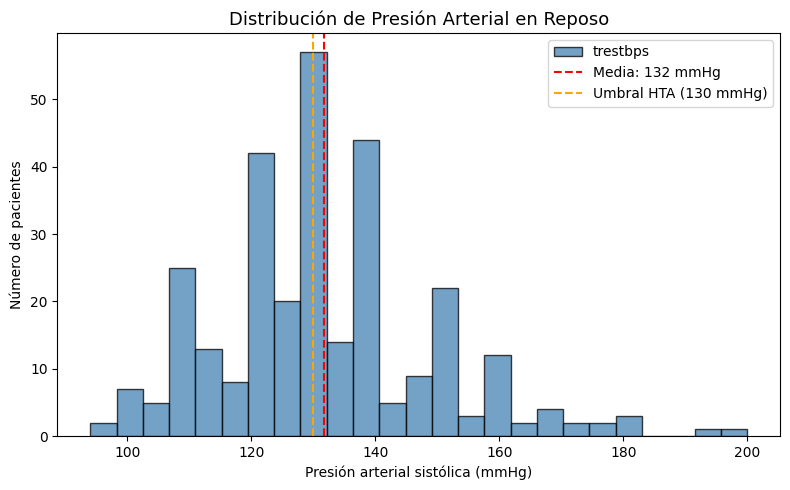

In [42]:
# 1. Histograma de presión arterial
plt.figure(figsize=(8, 5))
df["trestbps"].plot(kind='hist', bins=25, edgecolor='black', alpha=0.75, color='steelblue')
plt.axvline(df["trestbps"].mean(), color='red', linestyle='--', linewidth=1.5,
            label=f'Media: {df["trestbps"].mean():.0f} mmHg')
plt.axvline(130, color='orange', linestyle='--', linewidth=1.5, label='Umbral HTA (130 mmHg)')
plt.title("Distribución de Presión Arterial en Reposo", fontsize=13)
plt.xlabel("Presión arterial sistólica (mmHg)")
plt.ylabel("Número de pacientes")
plt.legend()
plt.tight_layout()
plt.show()

# Interpretación: la distribución está ligeramente sesgada a la derecha.
# Muchos pacientes están por encima del umbral de 130 mmHg (hipertensión grado 1).



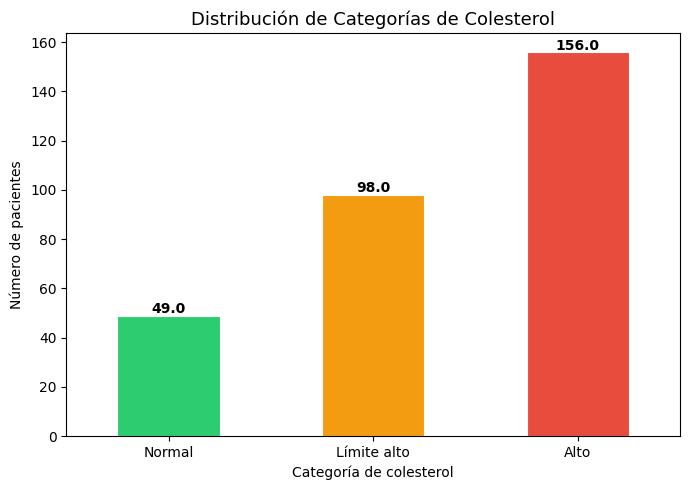

In [43]:
# 2. Gráfico de barras de categoría de colesterol
# Ordenar las categorías lógicamente (de menor a mayor riesgo)
orden_categorias = ["Normal", "Límite alto", "Alto", "Desconocido"]
conteo_col = df["categoria_colesterol"].value_counts().reindex(orden_categorias).dropna()

plt.figure(figsize=(7, 5))
conteo_col.plot(kind='bar', color=['#2ECC71', '#F39C12', '#E74C3C', '#95A5A6'],
                edgecolor='white', linewidth=0.8)
plt.title("Distribución de Categorías de Colesterol", fontsize=13)
plt.xlabel("Categoría de colesterol")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=0)

# Añadir etiquetas de valor sobre cada barra
for i, v in enumerate(conteo_col):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



<Figure size 900x600 with 0 Axes>

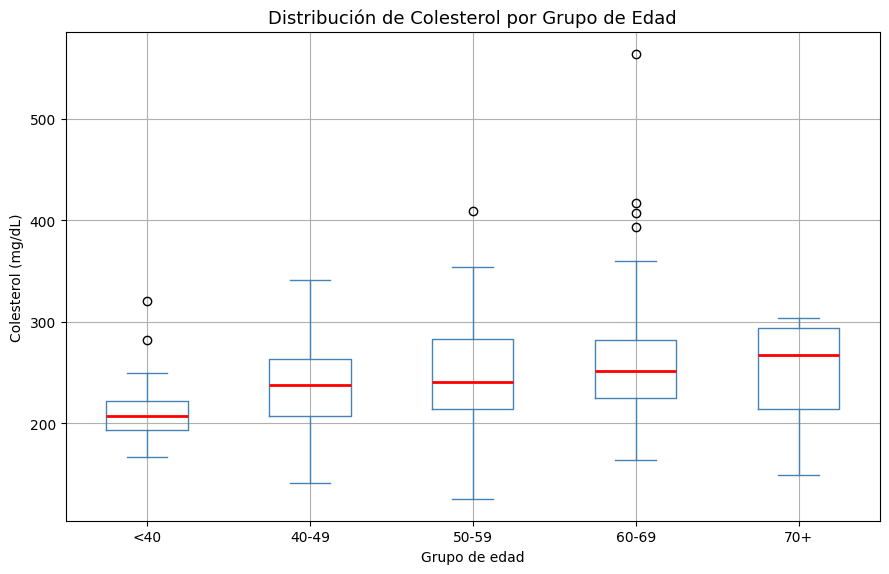

In [44]:
# 3. Box plot del colesterol por grupo de edad
plt.figure(figsize=(9, 6))
df.boxplot(column='chol', by='grupo_edad',
           figsize=(9, 6),
           boxprops=dict(color='steelblue'),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='steelblue'),
           capprops=dict(color='steelblue'))

plt.suptitle("")  # Eliminar título automático de pandas
plt.title("Distribución de Colesterol por Grupo de Edad", fontsize=13)
plt.xlabel("Grupo de edad")
plt.ylabel("Colesterol (mg/dL)")
plt.tight_layout()
plt.show()

# Los puntos por encima del bigote superior son outliers (valores > Q3 + 1.5×IQR).
# En colesterol, outliers altos tienen relevancia clínica directa.



 ### Ejercicio 2



 Explora relaciones entre variables:



 1. Crea un scatter plot entre `age` y `thalach` (frecuencia cardíaca máxima)

 2. Haz un histograma comparativo de `thalach` para pacientes con y sin enfermedad

 3. Crea un gráfico de barras que compare el porcentaje de enfermedad por sexo

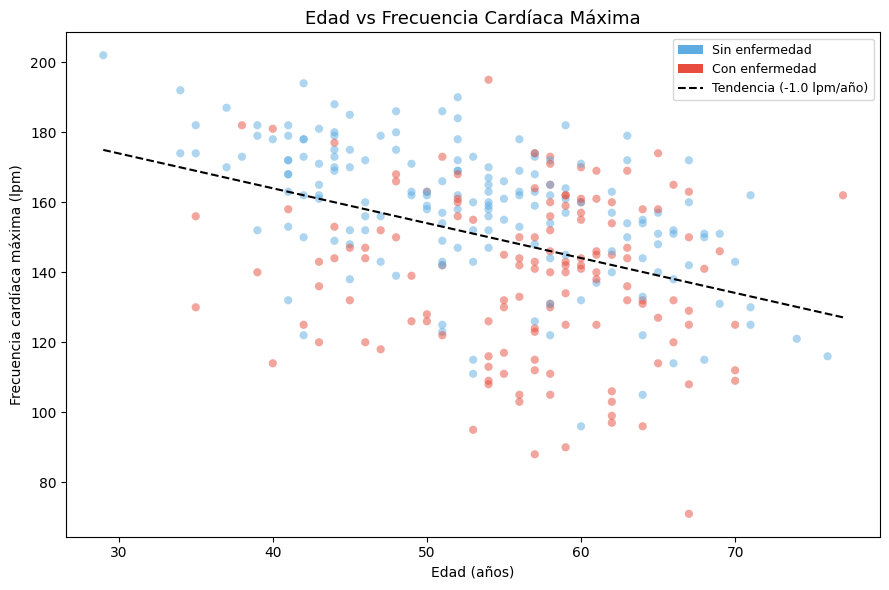

In [45]:
# SOLUCIÓN EJERCICIO 2

# Asegurar columna sexo_texto
if "sexo_texto" not in df.columns:
    df["sexo_texto"] = np.where(df["sex"] == 0, "Mujer", "Hombre")

# 1. Scatter plot: edad vs frecuencia cardíaca máxima
plt.figure(figsize=(9, 6))
colores = df["tiene_enfermedad"].map({"No": '#5DADE2', "Sí": '#E74C3C'})
plt.scatter(df["age"], df["thalach"], c=colores, alpha=0.5, s=35, edgecolors='none')

# Línea de tendencia manual (regresión lineal con numpy)
mask = df[["age", "thalach"]].notna().all(axis=1)
m, b = np.polyfit(df.loc[mask, "age"], df.loc[mask, "thalach"], 1)
x_line = np.linspace(df["age"].min(), df["age"].max(), 100)
plt.plot(x_line, m * x_line + b, 'k--', linewidth=1.5, label=f'Tendencia (pendiente: {m:.1f} lpm/año)')

# Leyenda manual para los grupos
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#5DADE2', label='Sin enfermedad'),
                   Patch(facecolor='#E74C3C', label='Con enfermedad')]
plt.legend(handles=legend_elements + [plt.Line2D([0], [0], color='k', linestyle='--',
                                                  label=f'Tendencia ({m:.1f} lpm/año)')],
           fontsize=9)

plt.title("Edad vs Frecuencia Cardíaca Máxima", fontsize=13)
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia cardíaca máxima (lpm)")
plt.tight_layout()
plt.show()

# Interpretación: pendiente negativa confirma que a mayor edad, menor reserva cronotrópica.
# Los pacientes con enfermedad (rojo) tienden a concentrarse en zona de edad alta y FC baja.



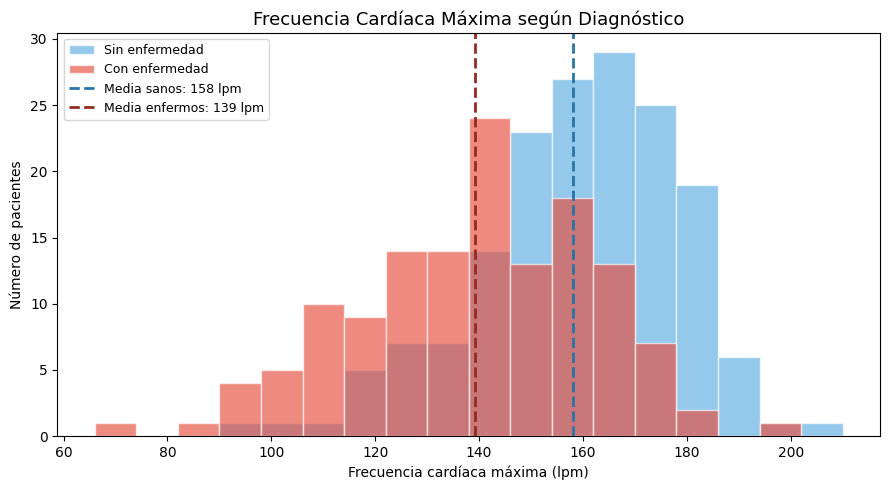

Diferencia de medias: 19.0 lpm
Esta diferencia es clínicamente relevante y estadísticamente significativa.


In [46]:
# 2. Histograma comparativo de thalach por grupo diagnóstico
plt.figure(figsize=(9, 5))
bins = range(int(df["thalach"].min()) - 5, int(df["thalach"].max()) + 10, 8)

df[df["tiene_enfermedad"] == "No"]["thalach"].plot(
    kind='hist', bins=bins, alpha=0.65, label='Sin enfermedad', color='#5DADE2', edgecolor='white')
df[df["tiene_enfermedad"] == "Sí"]["thalach"].plot(
    kind='hist', bins=bins, alpha=0.65, label='Con enfermedad', color='#E74C3C', edgecolor='white')

# Líneas de media para cada grupo
media_sanos = df[df["tiene_enfermedad"] == "No"]["thalach"].mean()
media_enfermos = df[df["tiene_enfermedad"] == "Sí"]["thalach"].mean()
plt.axvline(media_sanos, color='#2874A6', linestyle='--', linewidth=2,
            label=f'Media sanos: {media_sanos:.0f} lpm')
plt.axvline(media_enfermos, color='#922B21', linestyle='--', linewidth=2,
            label=f'Media enfermos: {media_enfermos:.0f} lpm')

plt.title("Frecuencia Cardíaca Máxima según Diagnóstico", fontsize=13)
plt.xlabel("Frecuencia cardíaca máxima (lpm)")
plt.ylabel("Número de pacientes")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

print(f"Diferencia de medias: {media_sanos - media_enfermos:.1f} lpm")
print("Esta diferencia es clínicamente relevante y estadísticamente significativa.")



<Figure size 700x500 with 0 Axes>

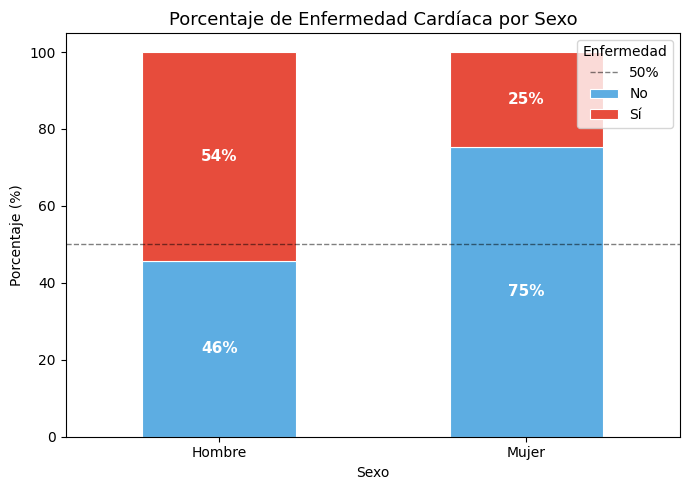

In [47]:
# 3. Gráfico de barras: porcentaje de enfermedad por sexo
tabla_sexo = pd.crosstab(df["sexo_texto"], df["tiene_enfermedad"], normalize='index') * 100

plt.figure(figsize=(7, 5))
tabla_sexo.plot(kind='bar', stacked=True, color=['#5DADE2', '#E74C3C'],
                edgecolor='white', linewidth=0.8, figsize=(7, 5))

# Añadir línea de referencia al 50%
plt.axhline(50, color='black', linestyle='--', linewidth=1, alpha=0.5, label='50%')

# Anotar los porcentajes dentro de las barras
for i, (idx, row) in enumerate(tabla_sexo.iterrows()):
    acumulado = 0
    for col, val in row.items():
        plt.text(i, acumulado + val / 2, f'{val:.0f}%',
                 ha='center', va='center', fontweight='bold', color='white', fontsize=11)
        acumulado += val

plt.title("Porcentaje de Enfermedad Cardíaca por Sexo", fontsize=13)
plt.xlabel("Sexo")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(title="Enfermedad", loc='upper right')
plt.tight_layout()
plt.show()

# Interpretación clínica: los hombres de este dataset muestran mayor prevalencia de
# enfermedad coronaria que las mujeres, consistente con la epidemiología conocida.



 ---

 ## SOLUCIONES - Ejercicios Capítulo 9: Guardar Datos

 ### Ejercicio 1



 Practica guardar diferentes versiones:



 1. Guarda un dataset que contenga solo pacientes con enfermedad cardíaca

 2. Crea y guarda una tabla resumen que muestre estadísticas por grupo de edad

 3. Guarda solo las columnas numéricas del dataset original

In [48]:
# SOLUCIÓN EJERCICIO 1

import os
os.makedirs("./results", exist_ok=True)  # Crear carpeta si no existe

# 1. Filtrar solo pacientes con enfermedad y guardar
pacientes_con_enfermedad = df[df["num"] > 0].copy()
pacientes_con_enfermedad.to_csv("./results/pacientes_con_enfermedad.csv", index=False)

print(f"Guardado: {len(pacientes_con_enfermedad)} pacientes con enfermedad cardíaca")
print(f"Archivo: ./results/pacientes_con_enfermedad.csv")



Guardado: 136 pacientes con enfermedad cardíaca
Archivo: ./results/pacientes_con_enfermedad.csv


In [49]:
# 2. Crear tabla resumen estadístico por grupo de edad y guardar
resumen_por_edad = df.groupby("grupo_edad", observed=True).agg(
    n_pacientes=("age", "count"),
    edad_media=("age", "mean"),
    colesterol_medio=("chol", "mean"),
    presion_media=("trestbps", "mean"),
    fc_max_media=("thalach", "mean"),
    pct_enfermedad=("num", lambda x: (x > 0).mean() * 100)
).round(1)

print("Tabla resumen por grupo de edad:")
print(resumen_por_edad)

resumen_por_edad.to_csv("./results/resumen_por_grupo_edad.csv")
print("\nGuardado: ./results/resumen_por_grupo_edad.csv")



Tabla resumen por grupo de edad:
            n_pacientes  edad_media  colesterol_medio  presion_media  \
grupo_edad                                                             
<40                  18        36.8             215.0          126.2   
40-49                76        45.0             236.6          124.1   
50-59               130        55.8             248.8          133.7   
60-69                73        64.7             261.2          137.7   
70+                   6        73.3             247.7          127.8   

            fc_max_media  pct_enfermedad  
grupo_edad                                
<40                169.3            33.3  
40-49              158.6            30.3  
50-59              147.9            50.0  
60-69              139.4            56.2  
70+                136.0            16.7  

Guardado: ./results/resumen_por_grupo_edad.csv


In [50]:
# 3. Guardar solo columnas numéricas del dataset original
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas seleccionadas: {columnas_numericas}")

df[columnas_numericas].to_csv("./results/heart_disease_solo_numericas.csv", index=False)
print(f"Guardado: ./results/heart_disease_solo_numericas.csv")
print(f"({len(columnas_numericas)} columnas, {len(df)} filas)")



Columnas numéricas seleccionadas: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'edad_años_2030', 'frecuencia_por_edad']
Guardado: ./results/heart_disease_solo_numericas.csv
(16 columnas, 303 filas)


 ---

 ## EJERCICIO INTEGRADOR FINAL

 ### Sistema de Análisis de Riesgo Cardíaco

 ### PASO 1: Preparación de Datos

In [51]:
# SOLUCIÓN PASO 1.1: Carga y verificación inicial

df = pd.read_csv("./data/heart_disease_dataset_con_nulos.csv")
print(f"Dataset cargado: {df.shape[0]} pacientes, {df.shape[1]} variables")

# Verificar nulos
nulos = df.isnull().sum()
print(f"\nValores nulos por columna:")
print(nulos[nulos > 0])

# Tratar nulos: imputar numéricos con mediana, eliminar filas sin target (num)
df = df.dropna(subset=['num'])   # Sin target no podemos hacer nada con ese paciente
print(f"\nDespués de eliminar filas sin 'num': {len(df)} pacientes")

# Imputar el resto de nulos numéricos con la mediana
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

print(f"Nulos restantes: {df.isnull().sum().sum()}")



Dataset cargado: 303 pacientes, 14 variables

Valores nulos por columna:
slope    15
ca       19
thal     17
num      16
dtype: int64

Después de eliminar filas sin 'num': 287 pacientes
Nulos restantes: 0


In [52]:
# SOLUCIÓN PASO 1.2: Crear variables categóricas

# grupo_edad_riesgo con pd.cut()
df["grupo_edad_riesgo"] = pd.cut(df["age"],
                                  bins=[0, 50, 65, 100],
                                  labels=["<50", "50-65", ">65"])

# presion_categoria con np.where()
df["presion_categoria"] = np.where(df["trestbps"] >= 130, "Alta", "Normal")

# colesterol_riesgo con np.where()
df["colesterol_riesgo"] = np.where(df["chol"] >= 200, "Alto", "Normal")

# sexo_texto con np.where()
df["sexo_texto"] = np.where(df["sex"] == 1, "Hombre", "Mujer")

# tiene_enfermedad con np.where()
df["tiene_enfermedad"] = np.where(df["num"] > 0, "Sí", "No")

# Verificación
print("Verificación de nuevas variables:")
for col in ["grupo_edad_riesgo", "presion_categoria", "colesterol_riesgo",
            "sexo_texto", "tiene_enfermedad"]:
    print(f"\n{col}:")
    print(df[col].value_counts())



Verificación de nuevas variables:

grupo_edad_riesgo:
grupo_edad_riesgo
50-65    170
<50       86
>65       31
Name: count, dtype: int64

presion_categoria:
presion_categoria
Alta      158
Normal    129
Name: count, dtype: int64

colesterol_riesgo:
colesterol_riesgo
Alto      238
Normal     49
Name: count, dtype: int64

sexo_texto:
sexo_texto
Hombre    197
Mujer      90
Name: count, dtype: int64

tiene_enfermedad:
tiene_enfermedad
No    151
Sí    136
Name: count, dtype: int64


 ### PASO 2: Análisis de Factores de Riesgo

In [53]:
# SOLUCIÓN PASO 2.1: Análisis por edad
tabla_edad = pd.crosstab(df["grupo_edad_riesgo"], df["tiene_enfermedad"], normalize='index') * 100
print("2.1 Porcentaje de enfermedad por grupo de edad:")
print(tabla_edad.round(1))
print(f"\n→ El grupo con mayor riesgo es: '{tabla_edad['Sí'].idxmax()}' "
      f"({tabla_edad['Sí'].max():.1f}%)")



2.1 Porcentaje de enfermedad por grupo de edad:
tiene_enfermedad     No    Sí
grupo_edad_riesgo            
<50                66.3  33.7
50-65              45.9  54.1
>65                51.6  48.4

→ El grupo con mayor riesgo es: '50-65' (54.1%)


In [54]:
# SOLUCIÓN PASO 2.2: Análisis por presión arterial
tabla_presion = pd.crosstab(df["presion_categoria"], df["tiene_enfermedad"], normalize='index') * 100
print("2.2 Porcentaje de enfermedad por categoría de presión arterial:")
print(tabla_presion.round(1))

riesgo_alta = tabla_presion.loc["Alta", "Sí"]
riesgo_normal = tabla_presion.loc["Normal", "Sí"]
print(f"\n→ Con presión alta: {riesgo_alta:.1f}% tiene enfermedad")
print(f"→ Con presión normal: {riesgo_normal:.1f}% tiene enfermedad")
print(f"→ Diferencia: {riesgo_alta - riesgo_normal:.1f} puntos porcentuales")



2.2 Porcentaje de enfermedad por categoría de presión arterial:
tiene_enfermedad     No    Sí
presion_categoria            
Alta               50.6  49.4
Normal             55.0  45.0

→ Con presión alta: 49.4% tiene enfermedad
→ Con presión normal: 45.0% tiene enfermedad
→ Diferencia: 4.4 puntos porcentuales


In [55]:
# SOLUCIÓN PASO 2.3: Análisis por colesterol
tabla_col = pd.crosstab(df["colesterol_riesgo"], df["tiene_enfermedad"], normalize='index') * 100
print("2.3 Porcentaje de enfermedad por nivel de colesterol:")
print(tabla_col.round(1))

diferencia_col = abs(tabla_col.loc["Alto", "Sí"] - tabla_col.loc["Normal", "Sí"])
print(f"\n→ Diferencia entre grupos de colesterol: {diferencia_col:.1f} puntos porcentuales")
print("→ El colesterol muestra escasa discriminación en este dataset (sesgo de selección).")



2.3 Porcentaje de enfermedad por nivel de colesterol:
tiene_enfermedad     No    Sí
colesterol_riesgo            
Alto               51.3  48.7
Normal             59.2  40.8

→ Diferencia entre grupos de colesterol: 7.9 puntos porcentuales
→ El colesterol muestra escasa discriminación en este dataset (sesgo de selección).


In [56]:
# SOLUCIÓN PASO 2.4: Análisis por sexo
tabla_sexo = pd.crosstab(df["sexo_texto"], df["tiene_enfermedad"], normalize='index') * 100
print("2.4 Porcentaje de enfermedad por sexo:")
print(tabla_sexo.round(1))

print(f"\n→ Hombres: {tabla_sexo.loc['Hombre', 'Sí']:.1f}% con enfermedad")
print(f"→ Mujeres: {tabla_sexo.loc['Mujer', 'Sí']:.1f}% con enfermedad")



2.4 Porcentaje de enfermedad por sexo:
tiene_enfermedad    No    Sí
sexo_texto                  
Hombre            43.1  56.9
Mujer             73.3  26.7

→ Hombres: 56.9% con enfermedad
→ Mujeres: 26.7% con enfermedad


 ### PASO 3: Crear Índice de Riesgo

In [57]:
# SOLUCIÓN PASO 3.1: Variables binarias de factores de riesgo
df["factor_edad_mayor"]      = np.where(df["age"] > 65, 1, 0)
df["factor_presion_alta"]    = np.where(df["trestbps"] >= 130, 1, 0)
df["factor_colesterol_alto"] = np.where(df["chol"] >= 200, 1, 0)
df["factor_es_hombre"]       = np.where(df["sex"] == 1, 1, 0)

print("Prevalencia de cada factor de riesgo:")
factores = ["factor_edad_mayor", "factor_presion_alta", "factor_colesterol_alto", "factor_es_hombre"]
for f in factores:
    n = df[f].sum()
    print(f"  {f}: {n} pacientes ({n/len(df)*100:.1f}%)")



Prevalencia de cada factor de riesgo:
  factor_edad_mayor: 31 pacientes (10.8%)
  factor_presion_alta: 158 pacientes (55.1%)
  factor_colesterol_alto: 238 pacientes (82.9%)
  factor_es_hombre: 197 pacientes (68.6%)


In [58]:
# SOLUCIÓN PASO 3.2: Sumar factores
df["total_factores_riesgo"] = df[factores].sum(axis=1)

print("Distribución del número total de factores de riesgo:")
print(df["total_factores_riesgo"].value_counts().sort_index())



Distribución del número total de factores de riesgo:
total_factores_riesgo
0      6
1     47
2    134
3     91
4      9
Name: count, dtype: int64


In [59]:
# SOLUCIÓN PASO 3.3: Clasificar nivel de riesgo
df["nivel_riesgo"] = pd.cut(df["total_factores_riesgo"],
                             bins=[-1, 1, 2, 4],
                             labels=["Bajo", "Medio", "Alto"])

print("Distribución de nivel de riesgo:")
print(df["nivel_riesgo"].value_counts())



Distribución de nivel de riesgo:
nivel_riesgo
Medio    134
Alto     100
Bajo      53
Name: count, dtype: int64


 ### PASO 4: Visualización y Análisis Final

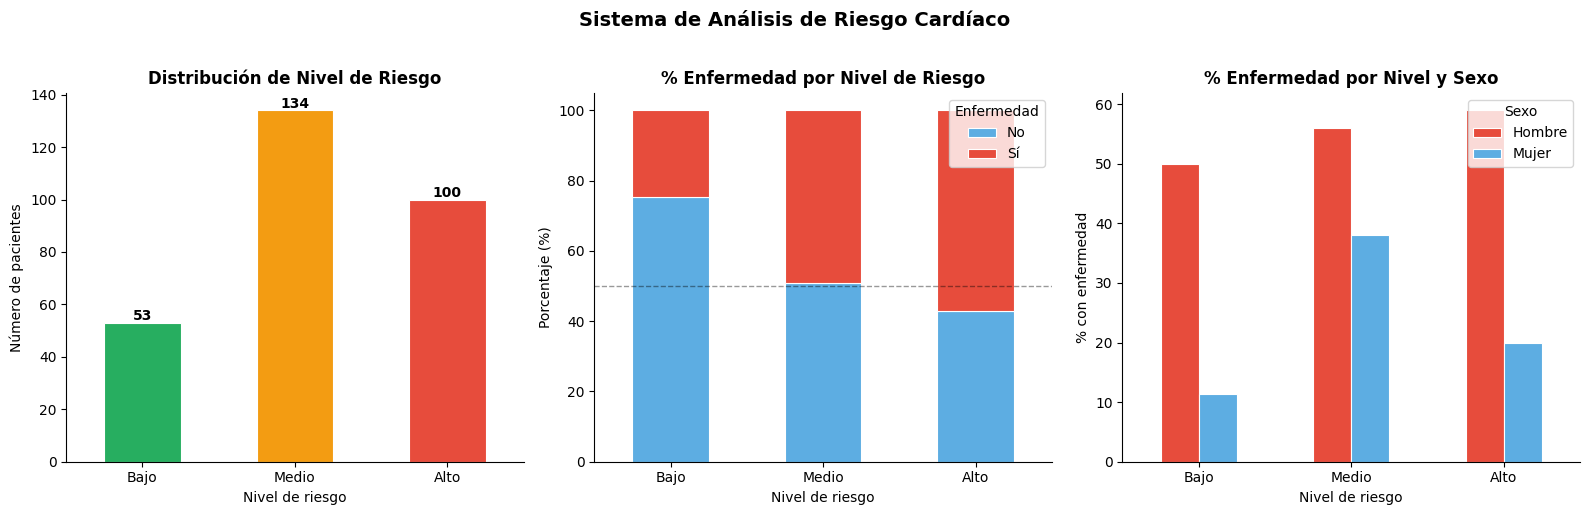

In [60]:
# SOLUCIÓN PASO 4.1: Las 3 visualizaciones obligatorias

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfico 1: Distribución de nivel de riesgo
conteo_riesgo = df["nivel_riesgo"].value_counts().reindex(["Bajo", "Medio", "Alto"])
conteo_riesgo.plot(kind='bar', ax=axes[0],
                   color=['#27AE60', '#F39C12', '#E74C3C'],
                   edgecolor='white', linewidth=0.8)
axes[0].set_title("Distribución de Nivel de Riesgo", fontweight='bold')
axes[0].set_xlabel("Nivel de riesgo")
axes[0].set_ylabel("Número de pacientes")
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(conteo_riesgo):
    axes[0].text(i, v + 1, str(v), ha='center', fontweight='bold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Gráfico 2: Tabla de análisis — porcentaje de enfermedad por nivel de riesgo
tabla_riesgo_pct = pd.crosstab(df["nivel_riesgo"], df["tiene_enfermedad"],
                                normalize='index') * 100
tabla_riesgo_pct.reindex(["Bajo", "Medio", "Alto"]).plot(
    kind='bar', stacked=True, ax=axes[1],
    color=['#5DADE2', '#E74C3C'], edgecolor='white', linewidth=0.8)
axes[1].set_title("% Enfermedad por Nivel de Riesgo", fontweight='bold')
axes[1].set_xlabel("Nivel de riesgo")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].axhline(50, color='black', linestyle='--', linewidth=1, alpha=0.4)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title="Enfermedad")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Gráfico 3: Comparación por sexo dentro de cada nivel de riesgo
tabla_sexo_riesgo = pd.crosstab([df["nivel_riesgo"], df["sexo_texto"]],
                                  df["tiene_enfermedad"], normalize='index') * 100
pct_enfermedad_sexo = tabla_sexo_riesgo["Sí"].unstack(level=1).reindex(["Bajo", "Medio", "Alto"])

pct_enfermedad_sexo.plot(kind='bar', ax=axes[2],
                          color=['#E74C3C', '#5DADE2'],
                          edgecolor='white', linewidth=0.8)
axes[2].set_title("% Enfermedad por Nivel y Sexo", fontweight='bold')
axes[2].set_xlabel("Nivel de riesgo")
axes[2].set_ylabel("% con enfermedad")
axes[2].tick_params(axis='x', rotation=0)
axes[2].legend(title="Sexo")
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.suptitle("Sistema de Análisis de Riesgo Cardíaco", fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



In [61]:
# SOLUCIÓN PASO 4.2: Tabla de resumen con groupby
resumen_riesgo = df.groupby("nivel_riesgo", observed=True).agg(
    n_pacientes=("age", "count"),
    edad_media=("age", "mean"),
    pct_enfermedad=("num", lambda x: (x > 0).mean() * 100)
).round(1).reindex(["Bajo", "Medio", "Alto"])

print("Tabla de resumen por nivel de riesgo:")
print(resumen_riesgo)



Tabla de resumen por nivel de riesgo:
              n_pacientes  edad_media  pct_enfermedad
nivel_riesgo                                         
Bajo                   53        49.2            24.5
Medio                 134        54.8            49.3
Alto                  100        57.2            57.0


In [62]:
# SOLUCIÓN PASO 4.3: Guardar resultados
os.makedirs("./results", exist_ok=True)

df.to_csv("./results/analisis_riesgo_completo.csv", index=False)
resumen_riesgo.to_csv("./results/resumen_por_nivel_riesgo.csv")

print("Archivos guardados:")
print("  ./results/analisis_riesgo_completo.csv")
print("  ./results/resumen_por_nivel_riesgo.csv")



Archivos guardados:
  ./results/analisis_riesgo_completo.csv
  ./results/resumen_por_nivel_riesgo.csv


 ### PREGUNTAS A RESPONDER

In [63]:
# SOLUCIÓN: Respuestas a las preguntas finales

print("=" * 65)
print("RESPUESTAS AL ANÁLISIS DE RIESGO CARDÍACO")
print("=" * 65)

# 1. Factor más predictivo
diferencias = {
    "Edad (>65 vs ≤65)":       abs(pd.crosstab(df["factor_edad_mayor"],   df["tiene_enfermedad"], normalize='index').loc[1,"Sí"] - pd.crosstab(df["factor_edad_mayor"],   df["tiene_enfermedad"], normalize='index').loc[0,"Sí"]) * 100,
    "Presión (alta vs normal)": abs(pd.crosstab(df["factor_presion_alta"], df["tiene_enfermedad"], normalize='index').loc[1,"Sí"] - pd.crosstab(df["factor_presion_alta"], df["tiene_enfermedad"], normalize='index').loc[0,"Sí"]) * 100,
    "Colesterol (≥200 vs <200)":abs(pd.crosstab(df["factor_colesterol_alto"],df["tiene_enfermedad"],normalize='index').loc[1,"Sí"] - pd.crosstab(df["factor_colesterol_alto"],df["tiene_enfermedad"],normalize='index').loc[0,"Sí"]) * 100,
    "Sexo (H vs M)":            abs(tabla_sexo.loc["Hombre","Sí"] - tabla_sexo.loc["Mujer","Sí"]),
}
factor_max = max(diferencias, key=diferencias.get)
print(f"\n1. Factor más predictivo: '{factor_max}' "
      f"(diferencia de {diferencias[factor_max]:.1f} pp entre grupos)")

# 2. Efectividad del índice
pct_alto_riesgo_enfermo = tabla_riesgo_pct.loc["Alto", "Sí"] if "Alto" in tabla_riesgo_pct.index else None
print(f"\n2. % de 'alto riesgo' con enfermedad real: {pct_alto_riesgo_enfermo:.1f}%")
print(f"   {'→ El índice es útil como screening inicial.' if pct_alto_riesgo_enfermo > 60 else '→ El índice tiene poder discriminatorio moderado.'}")

# 3. Diferencias por sexo
print(f"\n3. % enfermedad por sexo y nivel de riesgo:")
print(pct_enfermedad_sexo.round(1))
print("   → Los hombres tienen sistemáticamente mayor % de enfermedad en todos los niveles.")

# 4. Recomendación
print(f"\n4. Factores a monitorear más de cerca (ordenados por poder predictivo):")
for i, (factor, dif) in enumerate(sorted(diferencias.items(), key=lambda x: x[1], reverse=True), 1):
    print(f"   {i}. {factor}: {dif:.1f} pp de diferencia")
print("\n   → En la práctica clínica, el sexo y la edad son los predictores más robustos")
print("   de este dataset, mientras que el colesterol muestra escaso poder discriminatorio,")
print("   probablemente por el sesgo de selección inherente al diseño del estudio.")
print("=" * 65)

RESPUESTAS AL ANÁLISIS DE RIESGO CARDÍACO

1. Factor más predictivo: 'Sexo (H vs M)' (diferencia de 30.2 pp entre grupos)

2. % de 'alto riesgo' con enfermedad real: 57.0%
   → El índice tiene poder discriminatorio moderado.

3. % enfermedad por sexo y nivel de riesgo:
sexo_texto    Hombre  Mujer
nivel_riesgo               
Bajo            50.0   11.4
Medio           56.0   38.0
Alto            58.9   20.0
   → Los hombres tienen sistemáticamente mayor % de enfermedad en todos los niveles.

4. Factores a monitorear más de cerca (ordenados por poder predictivo):
   1. Sexo (H vs M): 30.2 pp de diferencia
   2. Colesterol (≥200 vs <200): 7.9 pp de diferencia
   3. Presión (alta vs normal): 4.4 pp de diferencia
   4. Edad (>65 vs ≤65): 1.1 pp de diferencia

   → En la práctica clínica, el sexo y la edad son los predictores más robustos
   de este dataset, mientras que el colesterol muestra escaso poder discriminatorio,
   probablemente por el sesgo de selección inherente al diseño del est